In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce

In [2]:
# Don't forget to change it for your computer. Use the 'clean' verion (from Ridha's Notebook)
path_to_clean_data_SA = '../../Data_project2/Our_treated_data/SA_clean.csv'
path_to_clean_data_DD = '../../Data_project2/Our_treated_data/DD_clean.csv'
path_to_clean_data_DM = '../../Data_project2/Our_treated_data/DM_clean.csv'

In [3]:
df_SA = pd.read_csv(path_to_clean_data_SA)

C:\Users\Cedric\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Categorical data in SA
We replace the categorical features such as symptoms by each symptom having one column and then 0 or 1 for postiive


In [4]:
df_SA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161358 entries, 0 to 2161357
Data columns (total 19 columns):
Unnamed: 0    int64
STUDYID       object
DOMAIN        object
USUBJID       int64
SASEQ         int64
SATERM        object
SAMODIFY      object
SACAT         object
SASCAT        object
SAPRESP       object
SAOCCUR       object
SASTAT        object
SAREASND      object
SASEV         object
VISITNUM      float64
EPOCH         object
SADY          float64
SASTDY        float64
SAEVINTX      object
dtypes: float64(3), int64(3), object(13)
memory usage: 313.3+ MB


In [5]:
df_SA['SAMODIFY'].value_counts()

Nausea/Vomiting                  122987
Abdominal pain                    99142
Conjunctivitis                    71999
Diarrhoea                         65184
Loss of appetite/Anorexia         64766
Headache                          64760
Dysphagia                         64756
Hiccups                           64747
Rash                              62851
Dyspnoea                          61024
Jaundice                          57157
Hematemesis                       57016
Melena                            56213
Cough                             54688
Chest pain                        52454
Myalgia                           51547
Bleeding gums                     50555
Fever                             50543
Vaginal bleeding                  50465
Bruising                          49814
Confused/disorientated            48661
Arthralgia                        48644
Hemoptysis                        48570
Epistaxis                         48230
Injection point bleeding          46251


In [6]:
sum(df_SA['SAMODIFY'].isna())

40083

In [7]:
# You need to import : import category_encoders as ce (pip install)
name = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)

# Then you fit the column which you wish to encode
symptoms = name.fit_transform(df_SA['SAMODIFY'])



In [8]:
# Now carefull ! we have transformed also the NaN into an encoding value (see 8-to-last)
symptoms.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161358 entries, 0 to 2161357
Data columns (total 61 columns):
SAMODIFY_Melena                           int64
SAMODIFY_Sore throat                      int64
SAMODIFY_Other clinical signs             int64
SAMODIFY_Conjunctivitis                   int64
SAMODIFY_Rash                             int64
SAMODIFY_Vaginal bleeding                 int64
SAMODIFY_Nose bleed/epistaxis             int64
SAMODIFY_Dysphagia                        int64
SAMODIFY_Hemoptysis                       int64
SAMODIFY_Headache                         int64
SAMODIFY_Loss of appetite/Anorexia        int64
SAMODIFY_Hiccups                          int64
SAMODIFY_Nausea/Vomiting                  int64
SAMODIFY_Fever                            int64
SAMODIFY_Myalgia                          int64
SAMODIFY_Dyspnoea                         int64
SAMODIFY_Bleeding gums                    int64
SAMODIFY_Cough                            int64
SAMODIFY_Coma/unconscio

In [9]:
#This removes the 9 first letters of the header for each column (removes SAMODIFY_)
symptoms.columns = [ x[9:] for x in symptoms.columns ] 

In [10]:
# This removes the column of NaN's (up for debate)
symptoms.drop(columns= 'nan', inplace= True)

In [11]:
symptoms # See, happy

,Melena,Sore throat,Other clinical signs,Conjunctivitis,Rash,Vaginal bleeding,Nose bleed/epistaxis,Dysphagia,Hemoptysis,Headache,...,Swollen eyelids,Evd,Tremors,Weight loss,Myalgia/Arthralgia,Hepatosplenomegaly,Meningeal,Confirmed evd,Asymptomatic,Evd vaccine trial
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2161354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2161355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2161356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# I am removing SAMODIFY AND SATERM 

"""
cols = [5,6]#[0,2]
df_SA.drop(df_SA.columns[cols], axis =1, inplace = True)
"""
#alternate writing
cols = ['SAMODIFY', 'SATERM']
df_SA.drop(columns= cols, inplace= True)

In [13]:
df_SA

,Unnamed: 0,STUDYID,DOMAIN,USUBJID,SASEQ,SACAT,SASCAT,SAPRESP,SAOCCUR,SASTAT,SAREASND,SASEV,VISITNUM,EPOCH,SADY,SASTDY,SAEVINTX
0,0,EJPDEJ,SA,8027,20,NaN,NaN,Y,NaN,NOT DONE,DON'T KNOW,NaN,NaN,TREATMENT,1.0,-8.0,NaN
1,1,EJPDEJ,SA,8027,15,NaN,NaN,Y,NaN,NOT DONE,UNFILLED,NaN,NaN,TREATMENT,1.0,-8.0,NaN
2,2,EJPDEJ,SA,8027,26,NaN,NaN,Y,NaN,NOT DONE,UNFILLED,NaN,NaN,TREATMENT,1.0,-8.0,NaN
3,3,EJPDEJ,SA,8027,28,NaN,NaN,Y,NaN,NOT DONE,UNFILLED,NaN,NaN,TREATMENT,1.0,-8.0,NaN
4,4,EJPDEJ,SA,8027,29,NaN,NaN,Y,NaN,NOT DONE,UNFILLED,NaN,NaN,TREATMENT,1.0,-8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161353,2161353,EUZJTB,SA,5901,76,NaN,NaN,Y,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,TREATMENT,2.0,NaN,NaN
2161354,2161354,EUZJTB,SA,5901,34,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,TREATMENT,1.0,NaN,NaN
2161355,2161355,EUZJTB,SA,5901,7,MEDICAL HISTORY,NaN,Y,NaN,NOT DONE,BLANK IN RAW DATA,NaN,NaN,NaN,1.0,NaN,NaN
2161356,2161356,EUZJTB,SA,5901,140,NaN,NaN,Y,N,NaN,NaN,NaN,NaN,TREATMENT,3.0,NaN,NaN


In [14]:
# this is the file were we add the one hot encoding ! 
df_SA_symp = df_SA.join(symptoms)

In [15]:
df_SA_symp

,Unnamed: 0,STUDYID,DOMAIN,USUBJID,SASEQ,SACAT,SASCAT,SAPRESP,SAOCCUR,SASTAT,...,Swollen eyelids,Evd,Tremors,Weight loss,Myalgia/Arthralgia,Hepatosplenomegaly,Meningeal,Confirmed evd,Asymptomatic,Evd vaccine trial
0,0,EJPDEJ,SA,8027,20,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
1,1,EJPDEJ,SA,8027,15,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
2,2,EJPDEJ,SA,8027,26,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
3,3,EJPDEJ,SA,8027,28,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
4,4,EJPDEJ,SA,8027,29,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161353,2161353,EUZJTB,SA,5901,76,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
2161354,2161354,EUZJTB,SA,5901,34,NaN,NaN,Y,Y,NaN,...,0,0,0,0,0,0,0,0,0,0
2161355,2161355,EUZJTB,SA,5901,7,MEDICAL HISTORY,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
2161356,2161356,EUZJTB,SA,5901,140,NaN,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Now we have the symptoms 
# Let's import the result (EBOLA/OTHER) and also some demographics (age and sex)
df_DD = pd.read_csv(path_to_clean_data_DD)


In [17]:
df_DM = pd.read_csv(path_to_clean_data_DM)

In [18]:
# Cause of death (We can see this needs to be changed....)
# TWO categories, EBOLA vs OTHERS 
df_DD['DDORRES']

def parse_death_causes(cause):
    ebola = ['EBOLA', 'DIED EBOLA POSITIVE', 'PROBABLE EBOLA','EVD', 'EBOLA SURVIVOR DIED BEFORE DISCHARGE']
    if(cause in ebola):
        return "EBOLA"
    else:
        return "OTHER"

df_DD.loc[:,'DDORRES'] = df_DD['DDORRES'].apply(lambda x: parse_death_causes(x))
death_causes_count = df_DD['DDORRES'].value_counts()

In [19]:
df_DD['DDORRES'].value_counts()

OTHER    628
EBOLA    400
Name: DDORRES, dtype: int64

In [20]:
df_DD['USUBJID'].value_counts()

728     4
8947    3
374     3
4638    3
5251    3
       ..
7298    1
7299    1
3209    1
3216    1
8192    1
Name: USUBJID, Length: 661, dtype: int64

In [21]:
"""cols = [0,1,2,9,10]
df_DD.drop(df_DD.columns[cols], axis =1, inplace = True)
"""
# Alternate writing
colsDD = ['Unnamed: 0', 'STUDYID', 'DOMAIN', 'DDSTRTPT', 'DDSTTPT']
df_DD.drop(columns= colsDD, inplace= True)
# the data set has now, EBOLA OR OTHER :)
# Let me just drop many columns 


In [22]:
"""colsDM = [0,1,2,6,10,11,12,14]
df_DM.drop(df_DM.columns[colsDM], axis =1, inplace = True)"""
colsDM = ['Unnamed: 0', 'STUDYID', 'DOMAIN', 'SITEID', 'ARMCD', 'ARM', 'COUNTRY', 'CITIES']
df_DM.drop(columns= colsDM, inplace= True)

In [23]:
# Let's only look at day one careful not the the same reference day right ..... ?  
df_DD1 = df_DD[df_DD['DDDY']==1.0]
df_DM1 = df_DM[df_DM['DMDY'] ==1.0]

In [24]:
# Let's merge 
Merged = df_DD1.merge(df_DM1, how = 'inner', on = 'USUBJID')

In [25]:
Merged["DDORRES"].value_counts()

OTHER    143
EBOLA     22
Name: DDORRES, dtype: int64

In [26]:
Merged['SEX'] = Merged['SEX'].apply(lambda x: 1 if x == 'M' else 0)

In [27]:
#This variable is a sequence number to ensure uniqueness of subject records within the domain. Each observation 
#(each recorded as a separate row in the table) will have a unique number within each subject.
Merged = Merged[Merged["DDSEQ"] == 1]

In [28]:
# Questionnable choice... (But I'm in no position to say better)

In [29]:
Merged

,USUBJID,DDSEQ,DDTEST,DDTESTCD,DDORRES,DDDY,RFSTDTC,DTHFL,AGE,AGEU,SEX,DMDY
0,6359,1,Location of Death,LOCDTH,OTHER,1.0,2014-08,Y,44.0,YEARS,1,1.0
2,75,1,Burial Organiser,BURLORG,OTHER,1.0,2014-12,Y,50.0,YEARS,1,1.0
4,6853,1,Death Notes,DTHNTE,OTHER,1.0,2014-12,Y,32.0,YEARS,0,1.0
5,7711,1,Primary Cause of Death,PRCDTH,EBOLA,1.0,2014-09,Y,12.0,YEARS,1,1.0
6,5778,1,Primary Cause of Death,PRCDTH,EBOLA,1.0,2014-09,Y,22.0,YEARS,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
157,4250,1,Primary Cause of Death,PRCDTH,OTHER,1.0,2014-12,Y,30.0,YEARS,1,1.0
160,4192,1,Primary Cause of Death,PRCDTH,OTHER,1.0,2015-02,Y,15.0,YEARS,0,1.0
162,1875,1,Death Notes,DTHNTE,OTHER,1.0,2015-08,Y,60.0,YEARS,0,1.0
163,3651,1,Primary Cause of Death,PRCDTH,OTHER,1.0,2015-08,Y,35.0,YEARS,0,1.0


In [30]:
Merged.USUBJID.nunique()

92

In [31]:
df_Temp = Merged.copy()
df_Temp2 = df_Temp[df_Temp['DDORRES'] == "EBOLA"]
df_Temp2.USUBJID.nunique()

13

In [32]:
df_SA_symp

,Unnamed: 0,STUDYID,DOMAIN,USUBJID,SASEQ,SACAT,SASCAT,SAPRESP,SAOCCUR,SASTAT,...,Swollen eyelids,Evd,Tremors,Weight loss,Myalgia/Arthralgia,Hepatosplenomegaly,Meningeal,Confirmed evd,Asymptomatic,Evd vaccine trial
0,0,EJPDEJ,SA,8027,20,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
1,1,EJPDEJ,SA,8027,15,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
2,2,EJPDEJ,SA,8027,26,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
3,3,EJPDEJ,SA,8027,28,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
4,4,EJPDEJ,SA,8027,29,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161353,2161353,EUZJTB,SA,5901,76,NaN,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
2161354,2161354,EUZJTB,SA,5901,34,NaN,NaN,Y,Y,NaN,...,0,0,0,0,0,0,0,0,0,0
2161355,2161355,EUZJTB,SA,5901,7,MEDICAL HISTORY,NaN,Y,NaN,NOT DONE,...,0,0,0,0,0,0,0,0,0,0
2161356,2161356,EUZJTB,SA,5901,140,NaN,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Merge with symptoms 
df_ml = Merged.merge(df_SA_symp, how = 'inner', on = 'USUBJID')

In [34]:
uniqueValues = df_ml['USUBJID'].nunique()
print("We have ",uniqueValues, " unique patients")
df_ml["DDORRES"].value_counts()

We have  92  unique patients


OTHER    3707
EBOLA     801
Name: DDORRES, dtype: int64

In [35]:
# The same person is tagged with ebola mutliple times because we have different symptoms ? 

In [36]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508 entries, 0 to 4507
Data columns (total 88 columns):
USUBJID                          4508 non-null int64
DDSEQ                            4508 non-null int64
DDTEST                           4508 non-null object
DDTESTCD                         4508 non-null object
DDORRES                          4508 non-null object
DDDY                             4508 non-null float64
RFSTDTC                          4508 non-null object
DTHFL                            4508 non-null object
AGE                              4508 non-null float64
AGEU                             4508 non-null object
SEX                              4508 non-null int64
DMDY                             4508 non-null float64
Unnamed: 0                       4508 non-null int64
STUDYID                          4508 non-null object
DOMAIN                           4508 non-null object
SASEQ                            4508 non-null int64
SACAT                          

In [37]:
df_ml['SASCAT']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4503    NaN
4504    NaN
4505    NaN
4506    NaN
4507    NaN
Name: SASCAT, Length: 4508, dtype: object

In [38]:
"""# Drop non_null values 
df_ml.drop(df_ml.columns[[23,27]], inplace = True, axis = 1)"""

'# Drop non_null values \ndf_ml.drop(df_ml.columns[[23,27]], inplace = True, axis = 1)'

In [39]:
# Very bruteforce hardfix to drop all NaN...
df_ml = df_ml.dropna(axis= 'columns')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508 entries, 0 to 4507
Data columns (total 76 columns):
USUBJID                          4508 non-null int64
DDSEQ                            4508 non-null int64
DDTEST                           4508 non-null object
DDTESTCD                         4508 non-null object
DDORRES                          4508 non-null object
DDDY                             4508 non-null float64
RFSTDTC                          4508 non-null object
DTHFL                            4508 non-null object
AGE                              4508 non-null float64
AGEU                             4508 non-null object
SEX                              4508 non-null int64
DMDY                             4508 non-null float64
Unnamed: 0                       4508 non-null int64
STUDYID                          4508 non-null object
DOMAIN                           4508 non-null object
SASEQ                            4508 non-null int64
Melena                         

In [40]:
len(df_ml[df_ml.duplicated()])

0

In [41]:
df_ml["DDSEQ"].value_counts()

1    4508
Name: DDSEQ, dtype: int64

In [42]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508 entries, 0 to 4507
Data columns (total 76 columns):
USUBJID                          4508 non-null int64
DDSEQ                            4508 non-null int64
DDTEST                           4508 non-null object
DDTESTCD                         4508 non-null object
DDORRES                          4508 non-null object
DDDY                             4508 non-null float64
RFSTDTC                          4508 non-null object
DTHFL                            4508 non-null object
AGE                              4508 non-null float64
AGEU                             4508 non-null object
SEX                              4508 non-null int64
DMDY                             4508 non-null float64
Unnamed: 0                       4508 non-null int64
STUDYID                          4508 non-null object
DOMAIN                           4508 non-null object
SASEQ                            4508 non-null int64
Melena                         

In [43]:
# All age are in years you can drop AGEUnit
df_ml["AGEU"].value_counts()

YEARS    4508
Name: AGEU, dtype: int64

# Now I'm bout to drop MANY MANY features (carefull I only kept DDSEQ ==1 for now )


In [44]:
"""cols_ml = [
    0, # USUBJID : no need for the ID anymore
    1, # DDSEQ
    2, # DDTEST
    3, # DDTESTCD
    5, # DDDY
    6, # RFSTDTC
    7, # DTHFL
    9, # AGEU
    11,# DMDY
    12,# Unnamed: 0
    13,# STUDYID
    14,# DOMAIN
    15,# SASEQ
    16,# SACAT
    17,# SASCAT
    18,# SAPRESP
    19,# SAOCCUR  
    20,# SASTAT
    21,# SAREASND
    22,# SASEV
    23,# EPOCH 
    24,# SADY
    25 # SASTDY
]
df_ML = df_ml.drop(df_ml.columns[cols_ml], axis = 1)"""

# Alternative writing:
cols = [
    'USUBJID',
    'DDSEQ',
    'DDTEST',
    'DDTESTCD',
    'DDDY',
    'RFSTDTC',
    'DTHFL',
    'AGEU',
    'DMDY',
    'Unnamed: 0',
    'STUDYID',
    'DOMAIN',
    'SASEQ',
    'Confirmed evd',
    'Evd',
    'Evd vaccine trial'
    #'SACAT',
    #'SASCAT',
    #'SAPRESP',
    #'SAOCCUR',
    #'SASTAT',
    #'SAREASND',
    #'SASEV',
    #'EPOCH',
    #'SADY',
    #'SASTDY'
]
df_ML = df_ml.drop(columns= cols, inplace= True)

In [45]:
# Ok so here we are left with EBOLA, other, the symptoms, age and sex 
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508 entries, 0 to 4507
Data columns (total 60 columns):
DDORRES                          4508 non-null object
AGE                              4508 non-null float64
SEX                              4508 non-null int64
Melena                           4508 non-null int64
Sore throat                      4508 non-null int64
Other clinical signs             4508 non-null int64
Conjunctivitis                   4508 non-null int64
Rash                             4508 non-null int64
Vaginal bleeding                 4508 non-null int64
Nose bleed/epistaxis             4508 non-null int64
Dysphagia                        4508 non-null int64
Hemoptysis                       4508 non-null int64
Headache                         4508 non-null int64
Loss of appetite/Anorexia        4508 non-null int64
Hiccups                          4508 non-null int64
Nausea/Vomiting                  4508 non-null int64
Fever                            4508 non-

In [46]:
# Try to see which columns are redundant...
worry_columns = []
for x in df_ml.columns:
    if df_ml[x].value_counts().size == 1:  # i.e. if there is only one value in the whole column, it is strange
        worry_columns.append(x)
        
worry_columns

['Agitation',
 'Vertebral pain',
 'Abdominal sensitivity',
 'Anuria',
 'Convulsions',
 'Tremors',
 'Weight loss',
 'Hepatosplenomegaly',
 'Meningeal']

In [47]:
### !!! Need to see with someone who knows more...

In [48]:
# Now drop those ~meaningless columns 
df_ml.drop(columns= worry_columns, inplace= True)

df_ml

,DDORRES,AGE,SEX,Melena,Sore throat,Other clinical signs,Conjunctivitis,Rash,Vaginal bleeding,Nose bleed/epistaxis,...,Pruritus,Bedsore,Insomnia,Patient autonomy,Digestive loss,Oral candidiasis,Diuresis,Swollen eyelids,Myalgia/Arthralgia,Asymptomatic
0,OTHER,44.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,OTHER,44.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OTHER,44.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OTHER,44.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,OTHER,44.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,OTHER,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4504,OTHER,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4505,OTHER,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4506,OTHER,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Let's try and model
from sklearn.preprocessing import StandardScaler


#select the features needed
df_triage = df_ml

#transform the dependent variable
dict_fstatus = {'EBOLA' : 1, 'OTHER' : 0}
df_triage['DDORRES'] = df_triage['DDORRES'].apply(lambda x : dict_fstatus[x]) 

In [50]:
# df_triage['USUBJID'].value_counts()

df_temp = df_triage.copy()
df_temp = df_temp[df_temp['DDORRES'] == 1]
df_temp['USUBJID'].unique()

In [51]:
df_triage.apply(lambda x: sum(x.isna()),axis=0)
df_triage.dropna(how='any',inplace= True)

In [52]:
#normalize the continuous variables 
scaler = StandardScaler()
df_triage[['AGE']] = scaler.fit_transform(df_triage[['AGE']])
df_triage.head()

,DDORRES,AGE,SEX,Melena,Sore throat,Other clinical signs,Conjunctivitis,Rash,Vaginal bleeding,Nose bleed/epistaxis,...,Pruritus,Bedsore,Insomnia,Patient autonomy,Digestive loss,Oral candidiasis,Diuresis,Swollen eyelids,Myalgia/Arthralgia,Asymptomatic
0,0,0.542287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.542287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.542287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.542287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.542287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
corr = df_triage.corr()
color = plt.get_cmap('coolwarm')
color.set_bad('lightgrey') 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns ,annot=True, fmt=".2f", cmap = color)
plt.show()

In C:\Users\Cedric\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Cedric\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Cedric\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Cedric\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Cedric\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

<Figure size 1200x800 with 2 Axes>

In [54]:

df_triage = df_triage.loc[:, (df_triage != 0).any(axis=0)]

In [55]:
import statsmodels.api as sm

X = sm.add_constant(df_triage.loc[:, df_triage.columns != 'DDORRES'])
y = df_triage['DDORRES']

est_OLS = sm.OLS(y, X.astype(float)).fit()
print(est_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                DDORRES   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     21.51
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          2.15e-170
Time:                        11:54:45   Log-Likelihood:                -1574.0
No. Observations:                4508   AIC:                             3250.
Df Residuals:                    4457   BIC:                             3577.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

C:\Users\Cedric\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
est_logit = sm.Logit(y, X.astype(float)).fit()
print(est_logit.summary())

         Current function value: 0.365538
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                DDORRES   No. Observations:                 4508
Model:                          Logit   Df Residuals:                     4457
Method:                           MLE   Df Model:                           50
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:                  0.2187
Time:                        11:54:45   Log-Likelihood:                -1647.8
converged:                      False   LL-Null:                       -2109.1
Covariance Type:            nonrobust   LLR p-value:                6.794e-161
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.5716      0.267     -5.894      0.000      -2.094      -1.049
AGE     

C:\Users\Cedric\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Backward elimination 

We feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

In [57]:
X = df_triage.loc[:, df_triage.columns != 'DDORRES']
y = df_triage['DDORRES']

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
        print("removed :", feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("remaining features :")
print(selected_features_BE)

removed : Nose bleed/epistaxis
removed : Insomnia
removed : Splenomegaly
removed : Oral candidiasis
removed : Shock
removed : Oedema
removed : Digestive loss
removed : Pruritus
removed : Bedsore
removed : Hepatomegaly
removed : Diuresis
removed : Dehydration
removed : Swollen eyelids
removed : Patient autonomy
removed : Other clinical signs
removed : Unexplained bleeding
removed : Nausea/Vomiting
removed : Abdominal pain
removed : Conjunctivitis
removed : Hiccups
removed : Dyspnoea
removed : Dysphagia
removed : Headache
removed : Diarrhoea
removed : Weakness/lack of energy
removed : Loss of appetite/Anorexia
removed : Myalgia/Arthralgia
removed : Jaundice
removed : Melena
removed : Fever
removed : Hematemesis
removed : Rash
removed : Myalgia
remaining features :
['AGE', 'SEX', 'Sore throat', 'Vaginal bleeding', 'Hemoptysis', 'Bleeding gums', 'Cough', 'Coma/unconscious', 'Arthralgia', 'Eye pain/sensitivity to light', 'Confused/disorientated', 'Chest pain', 'Hematuria', 'Bruising', 'Epis

###  /!\ Check correlation between features that have been removed (Maybe one has been taken out instead of another that is less representative...)

In [58]:
X = sm.add_constant(df_triage.loc[:, selected_features_BE])
y = df_triage['DDORRES']

est_logit = sm.Logit(y, X.astype(float)).fit()
print(est_logit.summary())

Optimization terminated successfully.
         Current function value: 0.369273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                DDORRES   No. Observations:                 4508
Model:                          Logit   Df Residuals:                     4490
Method:                           MLE   Df Model:                           17
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:                  0.2107
Time:                        11:54:46   Log-Likelihood:                -1664.7
converged:                       True   LL-Null:                       -2109.1
Covariance Type:            nonrobust   LLR p-value:                4.999e-178
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.9371      0.060    -15.730      0.

In [59]:
X = sm.add_constant(df_triage.loc[:, selected_features_BE])
y = df_triage['DDORRES']

est_OLS = sm.OLS(y, X.astype(float)).fit()
print(est_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                DDORRES   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     61.56
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          2.03e-189
Time:                        11:54:46   Log-Likelihood:                -1589.1
No. Observations:                4508   AIC:                             3214.
Df Residuals:                    4490   BIC:                             3330.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [60]:
X = df_triage.loc[:, df_triage.columns != 'DDORRES']
y = df_triage['DDORRES']

In [61]:
## Tree classifier 
from sklearn.model_selection import train_test_split
from sklearn import tree
X_x = X
Y_y = y
X_train, X_test, y_train, y_test = train_test_split(X_x,Y_y, test_size = 0.3, random_state = 0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Macro F1 score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 score: ",f1_score(y_test, y_pred, average='micro'))

Accuracy:  0.9719142645971914
Macro F1 score:  0.9520377473954447
Micro F1 score:  0.9719142645971914


##### Jean's part 

In [62]:
from sklearn.linear_model import ElasticNetCV
X = df_triage.loc[:, df_triage.columns != 'DDORRES']
y = df_triage['DDORRES']

reg = ElasticNetCV()
reg.fit(X, y)

print("Best alpha using built-in ElasticNetCV: %f" % reg.alpha_)
print("Best score using built-in ElasticNetCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
#df['FinalStatus'].value_counts()

Best alpha using built-in ElasticNetCV: 0.105230
Best score using built-in ElasticNetCV: 0.074678


C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Looking at symptoms with very non zeros
print(X["Nose bleed/epistaxis"].value_counts())
print(X["Insomnia"].value_counts())
print(X["Pruritus"].value_counts())
print(X["Digestive loss"].value_counts())
print(X["Swollen eyelids"].value_counts())
print(X["Oral candidiasis"].value_counts())
cols_ok = [
    "Nose bleed/epistaxis","Insomnia","Pruritus","Digestive loss","Swollen eyelids","Oral candidiasis",
    "Shock", "Dehydration","Epistaxis", "Bedsore", "Diuresis"
    
    
]
X = X.drop(columns= cols_ok, inplace=False)


In [63]:
X

,AGE,SEX,Melena,Sore throat,Other clinical signs,Conjunctivitis,Rash,Vaginal bleeding,Nose bleed/epistaxis,Dysphagia,...,Pruritus,Bedsore,Insomnia,Patient autonomy,Digestive loss,Oral candidiasis,Diuresis,Swollen eyelids,Myalgia/Arthralgia,Asymptomatic
0,0.542287,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.542287,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.542287,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.542287,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.542287,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,0.599052,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4504,0.599052,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4505,0.599052,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4506,0.599052,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X.apply(pd.Series.value_counts)

,AGE,SEX,Melena,Sore throat,Other clinical signs,Conjunctivitis,Rash,Vaginal bleeding,Nose bleed/epistaxis,Dysphagia,...,Pruritus,Bedsore,Insomnia,Patient autonomy,Digestive loss,Oral candidiasis,Diuresis,Swollen eyelids,Myalgia/Arthralgia,Asymptomatic
-1.955354,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.936621,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.912780,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.898589,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.894048,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.841824,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.785060,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.558002,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.501237,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.444473,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:


#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y,X_1).fit()
    
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\Cedric\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Cedric\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.365538
         Iterations: 35
         Current function value: 0.365541
         Iterations: 35


C:\Users\Cedric\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.365589
         Iterations: 35
         Current function value: 0.365636
         Iterations: 35


C:\Users\Cedric\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.365683
         Iterations 28
         Current function value: inf
         Iterations: 35


C:\Users\Cedric\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

#### Recursive Feature Elimination
The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df_triage.loc[:, df_triage.columns != 'DDORRES']
y = df_triage['DDORRES']

#no of features 
nof_list=np.arange(1, len(X.columns)+1)   

highest_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    #mean accuracy
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>highest_score):
        highest_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, highest_score))

Optimum number of features: 32
Score with 32 features: 0.169258


In [67]:
from sklearn.linear_model import LogisticRegression

X = df_triage.loc[:, df_triage.columns != 'DDORRES']
y = df_triage['DDORRES']

#no of features 
nof_list=np.arange(1, len(X.columns)+1)   

highest_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>highest_score):
        highest_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, highest_score))

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Optimum number of features: 22
Score with 22 features: 0.836659


C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [68]:
cols = np.array(X.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, n_features_to_select=11)   

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)              
print(cols[rfe.support_])

['SEX' 'Oedema' 'Hepatomegaly' 'Dehydration' 'Pruritus' 'Bedsore'
 'Insomnia' 'Digestive loss' 'Oral candidiasis' 'Diuresis'
 'Swollen eyelids']


#### Ensemble Methods
Embedded methods are a catch-all group of techniques which perform feature selection as part of the model construction process. The exemplar of this approach is the LASSO method for constructing a linear model, which penalizes the regression coefficients with an L1 penalty, shrinking many of them to zero. Any features which have non-zero regression coefficients are 'selected' by the LASSO algorithm. Improvements to the LASSO include Bolasso which bootstraps samples and elastic net regularization, which combines the L1 penalty of LASSO with the L2 penalty of ridge regression.

In [69]:
from sklearn.linear_model import LassoCV
X = df_triage.loc[:, df_triage.columns != 'DDORRES']
y = df_triage['DDORRES']

reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.056417
Best score using built-in LassoCV: 0.070843


C:\Users\Cedric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [70]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 48 variables


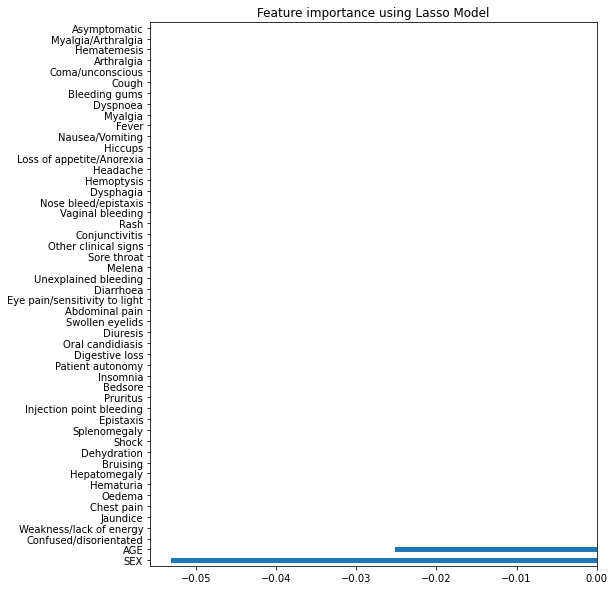

In [71]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

In [72]:
# Some columns such as Evd, Evd vaccine trial,
#confirmed evd should be removed, strange value for SEX ?
# I removed them

In [73]:
df_triage["Confirmed evd"].value_counts()

KeyError: 'Confirmed evd'